In [1]:
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
def kernel(g1, g2,lamb):
    one = np.ones(g1.number_of_nodes())

    A1 = nx.adjacency_matrix(g1.to_undirected()).todense()
    
    A2 = nx.adjacency_matrix(g2.to_undirected()).todense()

    Lamb1,U1 = np.linalg.eigh(A1)
    Lamb2,U2 = np.linalg.eigh(A2)
    print(np.max(Lamb1), np.max(Lamb2))
    
    L = np.kron(one.transpose().dot(U1), one.transpose().dot(U2))
    R = np.kron(U1.transpose().dot(one), U2.transpose().dot(one))
    
    D = 1/(1 - lamb*np.kron(Lamb1,Lamb2))
    #D = np.exp(lamb*np.kron(Lamb1,Lamb2))
    
    k = L.dot(np.diag(D)).dot(R.transpose())
    
    return k

def kernel_normalized(g1, g2,lamb):
    one = np.ones(g1.number_of_nodes())

    A1 = nx.adjacency_matrix(g1.to_undirected()).todense()
    D1 = 1/(1 + A1.dot(one))
    A1 = A1.dot(np.diag(1/(A1.dot(one) + 1).A.flatten()))
    
    A2 = nx.adjacency_matrix(g2.to_undirected()).todense()
    A2 = A2.dot(np.diag(1/(A2.dot(one) + 1).A.flatten()))

    Lamb1,U1 = np.linalg.eigh(A1)
    Lamb2,U2 = np.linalg.eigh(A2)
    print(np.max(Lamb1), np.max(Lamb2))
    
    L = np.kron(one.transpose().dot(U1), one.transpose().dot(U2))
    R = np.kron(U1.transpose().dot(one), U2.transpose().dot(one))
    
    D = 1/(1 - lamb*np.kron(Lamb1,Lamb2))
    #D = np.exp(lamb*np.kron(Lamb1,Lamb2))
    
    k = L.dot(np.diag(D)).dot(R.transpose())
    
    return k



In [34]:
def pairwise_kernels(graphs,lamb):
    n = len(graphs)
    K = np.zeros((n,n))
    for i in range(0,n):
        for j in range(i,n):
            k = kernel_normalized(graphs[i],graphs[j],lamb)
            K[i,j] = k
            K[j,i] = k
    return K

In [35]:
lamb = 0.01
res = {}
for w in range(0,28,7):
    graphs = [nx.read_gml('./data/taxi-2014-NTA/12/NTACycle%02dSnap0.gml'%d) for d in range(w,w+7)]
    K = pairwise_kernels(graphs,lamb)
    res[w] = K

2.44156028238 2.44156028238
2.44156028238 2.46727505533
2.44156028238 2.4414117994
2.44156028238 2.45181557678
2.44156028238 2.37998307711
2.44156028238 2.22927938086
2.44156028238 2.33550784714
2.46727505533 2.46727505533
2.46727505533 2.4414117994
2.46727505533 2.45181557678
2.46727505533 2.37998307711
2.46727505533 2.22927938086
2.46727505533 2.33550784714
2.4414117994 2.4414117994
2.4414117994 2.45181557678
2.4414117994 2.37998307711
2.4414117994 2.22927938086
2.4414117994 2.33550784714
2.45181557678 2.45181557678
2.45181557678 2.37998307711
2.45181557678 2.22927938086
2.45181557678 2.33550784714
2.37998307711 2.37998307711
2.37998307711 2.22927938086
2.37998307711 2.33550784714
2.22927938086 2.22927938086
2.22927938086 2.33550784714
2.33550784714 2.33550784714
2.38082744293 2.38082744293
2.38082744293 2.5066773092
2.38082744293 2.5763455245
2.38082744293 2.35714789875
2.38082744293 2.31702454252
2.38082744293 2.29794527761
2.38082744293 2.30852874842
2.5066773092 2.5066773092
2.50

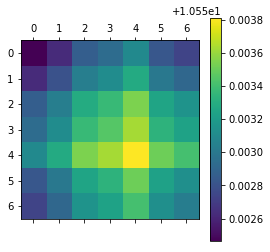

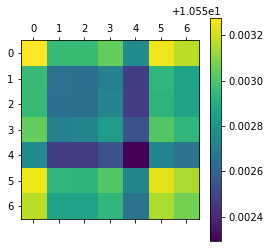

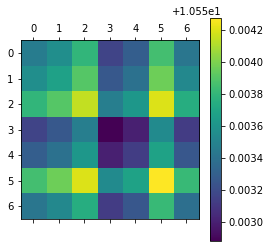

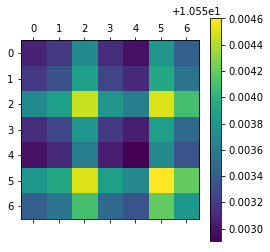

In [36]:
#geometry random walk lamb = 0.01 unnormalized

for w,K in res.items():    
    plt.matshow(np.log(K))
    plt.colorbar()
    plt.show()

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


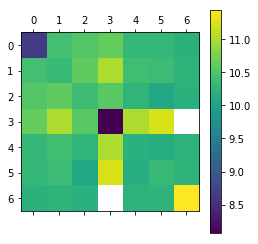

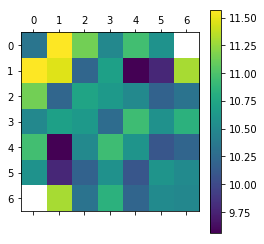

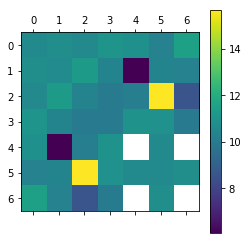

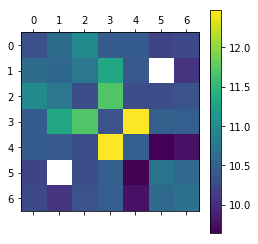

In [25]:
#geometry_random_walk lamb = .01
for w,K in res.items():    
    plt.matshow(np.log(K))
    plt.colorbar()
    plt.show()

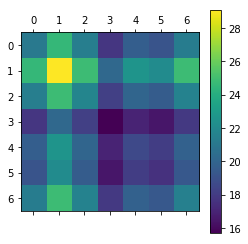

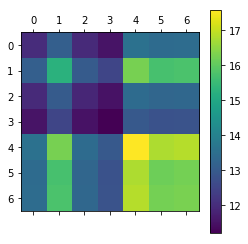

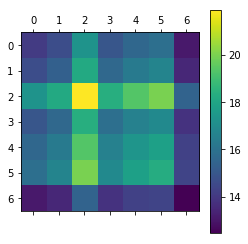

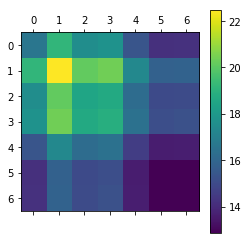

In [18]:
#exponential random walk lamb = .01
for w,K in res.items():    
    plt.matshow(np.log(K))
    plt.colorbar()
    plt.show()

In [20]:
np.linalg.eigvals(K)

array([  5.88823802e+09,   1.27487438e+08,   1.19299730e+06,
         6.25566320e+04,   2.85994602e+04,   2.34006455e+03,
         7.90649294e+01])

In [21]:
K

array([[  1.66757000e+07,   2.17424711e+08,   4.23481416e+07,
          5.15685389e+07,   4.75731324e+06,   1.43412815e+06,
          1.49007279e+06],
       [  2.17424711e+08,   5.72832113e+09,   5.77613301e+08,
          7.16658882e+08,   3.41168004e+07,   7.46381820e+06,
          7.88480395e+06],
       [  4.23481416e+07,   5.77613301e+08,   1.08096236e+08,
          1.31828175e+08,   1.14502290e+07,   3.28726203e+06,
          3.42941123e+06],
       [  5.15685389e+07,   7.16658882e+08,   1.31828175e+08,
          1.60994079e+08,   1.37184287e+07,   3.89215707e+06,
          4.06341683e+06],
       [  4.75731324e+06,   3.41168004e+07,   1.14502290e+07,
          1.37184287e+07,   2.15796422e+06,   8.32118183e+05,
          8.49401231e+05],
       [  1.43412815e+06,   7.46381820e+06,   3.28726203e+06,
          3.89215707e+06,   8.32118183e+05,   3.80699908e+05,
          3.83127580e+05],
       [  1.49007279e+06,   7.88480395e+06,   3.42941123e+06,
          4.06341683e+06,   8.49